# EXTRACCIÓN DE LOS DATOS DE LA API DE OPEN METEO (HISTORICAL WEATHER)

In [ ]:
import requests
import pandas as pd

In [ ]:
#Ubicacion: Guadalajara Jalisco
LATITUDE = 20.66682
LONGITUDE = -103.39182
TIMEZONE = "America/Mexico_City"

#Periodo de tiempo de Febrero 2020 a 2024
YEARS = [2020, 2021, 2022, 2023, 2024]
MONTH = "02" # MES DE FEBRERO

#Lista de parametros por hora que pedimos a la API
hourly_params = "temperature_2m,precipitation,relativehumidity_2m,windspeed_10m,is_day,shortwave_radiation"


In [ ]:
def obtener_datos_clima_API(year, month):
    url = f"https://archive-api.open-meteo.com/v1/archive?latitude={LATITUDE}&longitude={LONGITUDE}&start_date={year}-{month}-01&end_date={year}-{month}-27&timezone={TIMEZONE}&hourly={hourly_params}"
    response = requests.get(url)
    data = response.json()
    return data

In [ ]:
dataframes = []

for year in YEARS:
    data = obtener_datos_clima_API(year, MONTH)

    #Convertir la parte "hourly" del JSON en DATAFRAME
    df_year = pd.DataFrame(data['hourly'])

    # Convertir la comulmna a datatime
    df_year['time'] = pd.to_datetime(df_year['time'])

    # Extraer años, mes y dia
    df_year['year'] = df_year['time'].dt.year
    df_year['month'] = df_year['time'].dt.month
    df_year['day'] = df_year['time'].dt.day

    #Agregar el dataframe
    dataframes.append(df_year)

    #Concatenar los dataframes
    print(f"Datos obtenidos para el año {year}")
    print(data)
    print("\n")



Datos obtenidos para el año 2020
{'latitude': 20.632689, 'longitude': -103.35016, 'generationtime_ms': 0.44596195220947266, 'utc_offset_seconds': -21600, 'timezone': 'America/Mexico_City', 'timezone_abbreviation': 'GMT-6', 'elevation': 1598.0, 'hourly_units': {'time': 'iso8601', 'temperature_2m': '°C', 'precipitation': 'mm', 'relativehumidity_2m': '%', 'windspeed_10m': 'km/h', 'is_day': '', 'shortwave_radiation': 'W/m²'}, 'hourly': {'time': ['2020-02-01T00:00', '2020-02-01T01:00', '2020-02-01T02:00', '2020-02-01T03:00', '2020-02-01T04:00', '2020-02-01T05:00', '2020-02-01T06:00', '2020-02-01T07:00', '2020-02-01T08:00', '2020-02-01T09:00', '2020-02-01T10:00', '2020-02-01T11:00', '2020-02-01T12:00', '2020-02-01T13:00', '2020-02-01T14:00', '2020-02-01T15:00', '2020-02-01T16:00', '2020-02-01T17:00', '2020-02-01T18:00', '2020-02-01T19:00', '2020-02-01T20:00', '2020-02-01T21:00', '2020-02-01T22:00', '2020-02-01T23:00', '2020-02-02T00:00', '2020-02-02T01:00', '2020-02-02T02:00', '2020-02-02T03

In [ ]:
# Unir en un solo DF
df_weather = pd.concat(dataframes, ignore_index=True)
# Visualizar los primeros 10 registros
df_weather.head()

,time,temperature_2m,precipitation,relativehumidity_2m,windspeed_10m,is_day,shortwave_radiation,year,month,day
0,2020-02-01 00:00:00,16.2,0.0,34,1.8,0,0.0,2020,2,1
1,2020-02-01 01:00:00,15.6,0.0,36,3.6,0,0.0,2020,2,1
2,2020-02-01 02:00:00,15.1,0.0,38,3.9,0,0.0,2020,2,1
3,2020-02-01 03:00:00,14.6,0.0,40,3.6,0,0.0,2020,2,1
4,2020-02-01 04:00:00,13.8,0.0,43,3.5,0,0.0,2020,2,1


In [ ]:
# Verificamos los ultimos registros para que coincidan con el 2024
df_weather.tail()

,time,temperature_2m,precipitation,relativehumidity_2m,windspeed_10m,is_day,shortwave_radiation,year,month,day
3235,2024-02-27 19:00:00,24.9,0.0,21,21.4,0,71.0,2024,2,27
3236,2024-02-27 20:00:00,23.3,0.0,25,24.3,0,0.0,2024,2,27
3237,2024-02-27 21:00:00,22.2,0.0,26,19.4,0,0.0,2024,2,27
3238,2024-02-27 22:00:00,21.2,0.0,26,15.0,0,0.0,2024,2,27
3239,2024-02-27 23:00:00,20.0,0.0,26,12.3,0,0.0,2024,2,27


## CARGAMOS LOS DATOS TRANSFORMADOS EN GLUE DESDE GITHUB


In [ ]:
url = "https://raw.githubusercontent.com/JesusVargasF/proyecto-clima-aws/refs/heads/main/datos_clima_gdl.csv"
df_clima = pd.read_csv(url)
df_clima.head()

,temperature,precipitation,humidity,windspeed,is_day,shortwave_radiation,year,month,day,id
0,16.2,0.0,34,1.8,0,0,2020,2,1,bb65214f-9199-4fcc-b114-0de55bc20c36
1,15.6,0.0,36,3.6,0,0,2020,2,1,03f06464-aa04-4b5b-aae4-cb8fec2a28e4
2,15.1,0.0,38,3.9,0,0,2020,2,1,5f58d71f-9661-4acd-8d85-701b63e5cf02
3,14.6,0.0,40,3.6,0,0,2020,2,1,844f8b41-5cf0-4b53-be60-549d5dcc7b59
4,13.8,0.0,43,3.5,0,0,2020,2,1,5985745b-8cdf-4562-acce-4feff6bb1bb3


In [ ]:
df_clima.tail()

,temperature,precipitation,humidity,windspeed,is_day,shortwave_radiation,year,month,day,id
3235,24.9,0.0,21,21.4,0,71,2024,2,27,f207a9d3-3df5-4ada-8809-b799a1930236
3236,23.3,0.0,25,24.3,0,0,2024,2,27,e4b0b176-e220-4273-9f1c-848ee638c885
3237,22.2,0.0,26,19.4,0,0,2024,2,27,9eab86e6-b2a9-4806-bad1-dc35df752b7c
3238,21.2,0.0,26,15.0,0,0,2024,2,27,2b1f13a4-61c8-41b0-9c20-50e31dbff77b
3239,20.0,0.0,26,12.3,0,0,2024,2,27,e62c906b-9f0a-4557-86fd-b71547d2c40a


In [ ]:
df_clima.rename(columns={
    "windspeed": "velocidad_viento",
    "shortwave_radiation": "radiacion_solar",
    "is_day": "es_dia",
    "temperature": "temperatura",
    "precipitation": "precipitacion",
    "humidity": "humedad_relativa"
},inplace=True)

df_clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temperatura       3240 non-null   float64
 1   precipitacion     3240 non-null   float64
 2   humedad_relativa  3240 non-null   int64  
 3   velocidad_viento  3240 non-null   float64
 4   es_dia            3240 non-null   int64  
 5   radiacion_solar   3240 non-null   int64  
 6   year              3240 non-null   int64  
 7   month             3240 non-null   int64  
 8   day               3240 non-null   int64  
 9   id                3240 non-null   object 
dtypes: float64(3), int64(6), object(1)
memory usage: 253.3+ KB


In [ ]:
# Numero de duplicados
num_duplicados = df_clima.duplicated().sum()
print(f"Numero de duplicados: {num_duplicados}")

Numero de duplicados: 0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
numerical_columns = ["temperatura","precipitacion","humedad_relativa","velocidad_viento","radiacion_solar"]

In [ ]:
# Revisar estadisticas basicas del dataframe
df_clima.describe()

,temperatura,precipitacion,humedad_relativa,velocidad_viento,es_dia,radiacion_solar,year,month,day
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.0,3240.000000
mean,18.590957,0.022068,44.688889,8.393920,0.458333,246.529321,2022.000000,2.0,14.000000
std,5.655717,0.193306,22.111092,5.691538,0.498338,332.431903,1.414432,0.0,7.790083
min,5.800000,0.000000,5.000000,0.000000,0.000000,0.000000,2020.000000,2.0,1.000000
25%,13.900000,0.000000,25.000000,4.100000,0.000000,0.000000,2021.000000,2.0,7.000000
50%,17.600000,0.000000,43.000000,6.600000,0.000000,1.000000,2022.000000,2.0,14.000000
75%,23.400000,0.000000,62.000000,11.800000,1.000000,498.250000,2023.000000,2.0,21.000000
max,31.500000,5.000000,99.000000,33.200000,1.000000,977.000000,2024.000000,2.0,27.000000


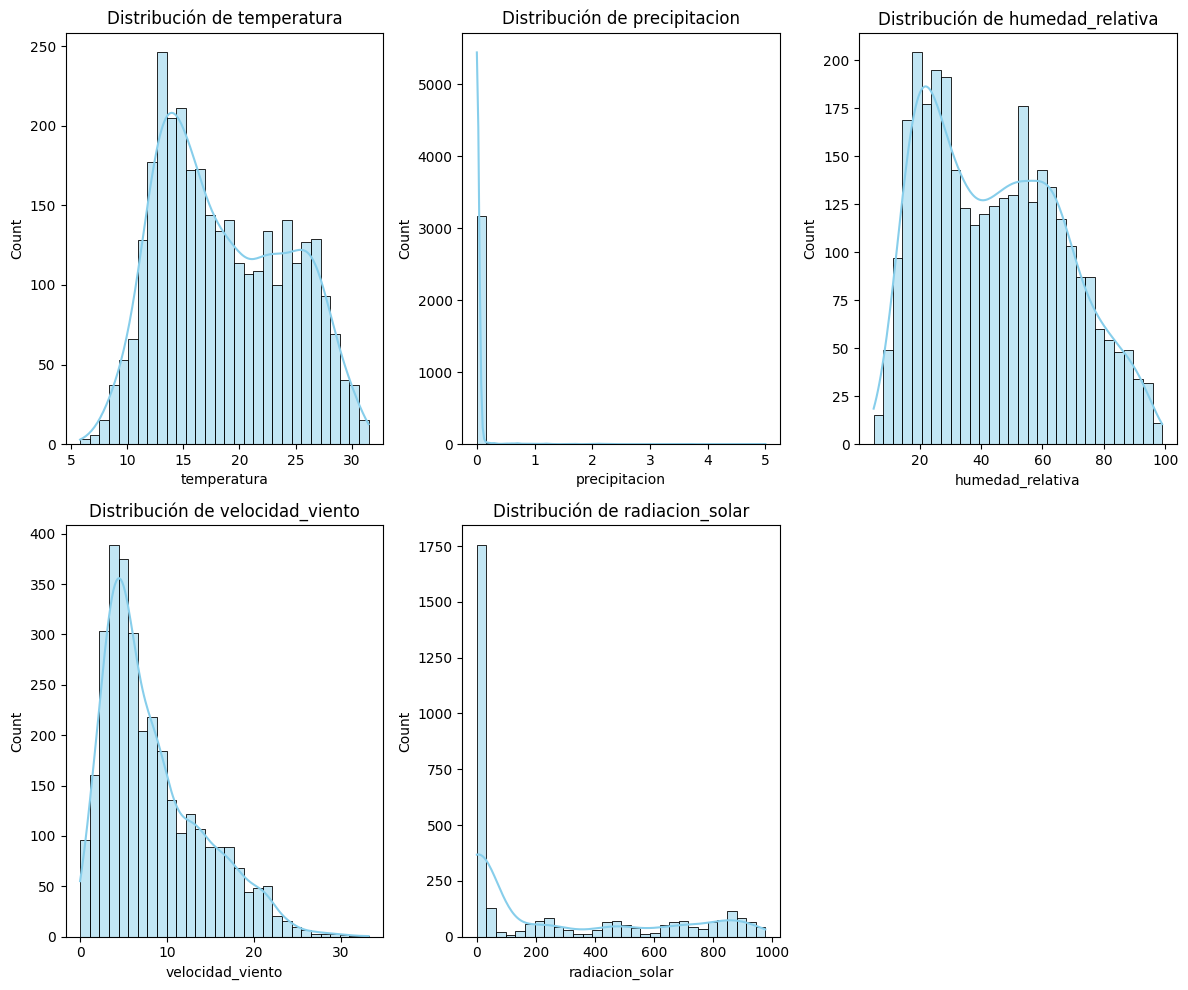

In [ ]:
# Configuran el tamaño del gráfico
plt.figure(figsize=(12, 10))

for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_clima[col].dropna(), kde=True, bins=30, color="skyblue")
    plt.title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

<ipython-input-22-68b082246e9a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clima, x='es_dia', palette='pastel')


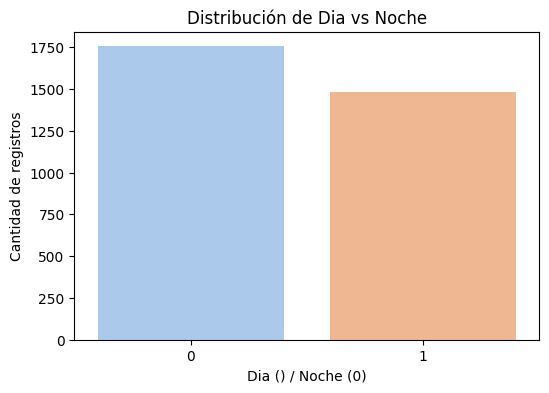

In [ ]:
#Grafico para contendo de es_Day
plt.figure(figsize=(6, 4))
sns.countplot(data=df_clima, x='es_dia', palette='pastel')
plt.title('Distribución de Dia vs Noche')
plt.xlabel('Dia () / Noche (0)')
plt.ylabel('Cantidad de registros')
plt.show()


Text(0, 0.5, 'Humedad (%)')

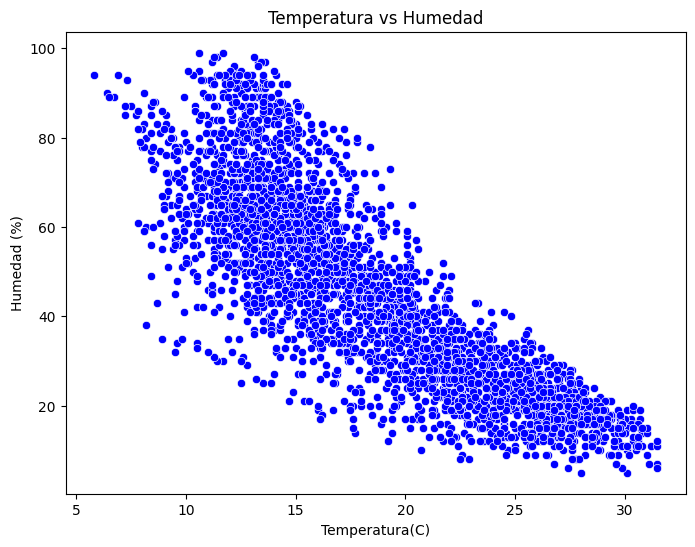

In [ ]:
# Scatter plot de temperatura vs humedad relativa
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clima, x='temperatura', y='humedad_relativa', color = "blue")
plt.title('Temperatura vs Humedad')
plt.xlabel('Temperatura(C)')
plt.ylabel('Humedad (%)')

Text(0, 0.5, 'Humedad (%)')

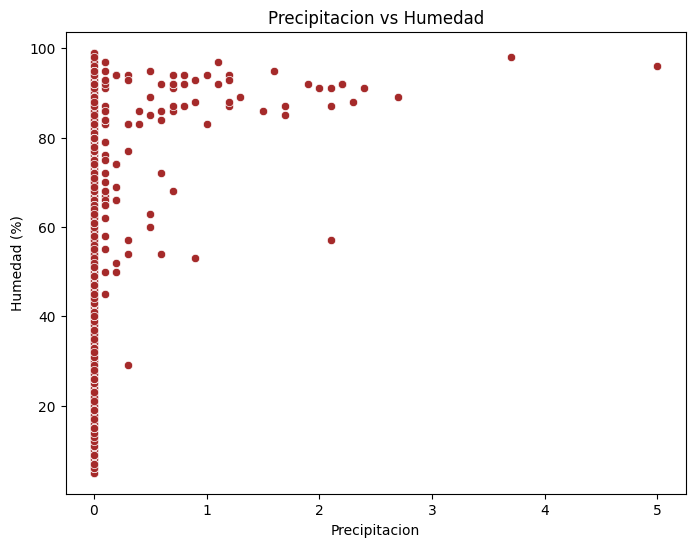

In [ ]:
# Scatter plot para Precipitacion vs humedad
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clima, x='precipitacion', y='humedad_relativa', color = "brown")
plt.title('Precipitacion vs Humedad')
plt.xlabel('Precipitacion')
plt.ylabel('Humedad (%)')

Text(0, 0.5, 'Temperatura (C)')

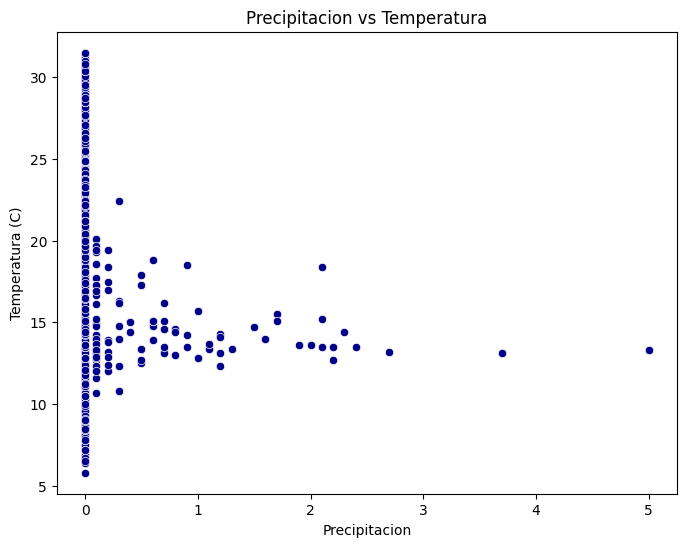

In [ ]:
#Scatter plot de Precipitacion vs Humedad
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clima, x='precipitacion', y='temperatura', color = "darkblue")
plt.title('Precipitacion vs Temperatura')
plt.xlabel('Precipitacion')
plt.ylabel('Temperatura (C)')

Text(0, 0.5, 'Humedad Relativa (%)')

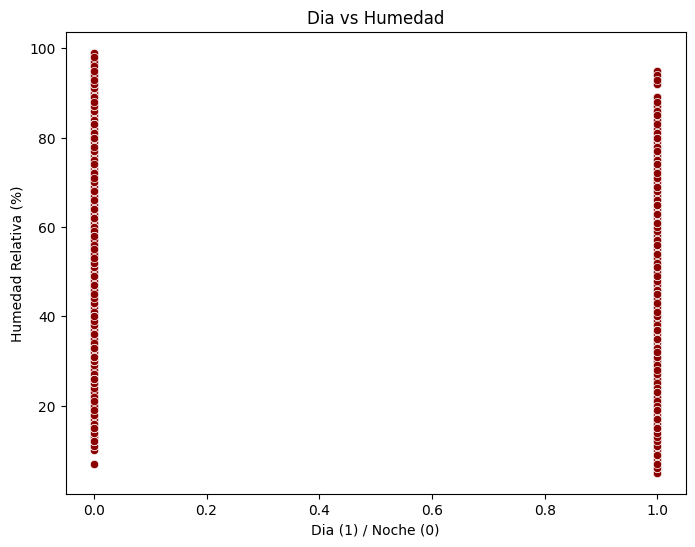

In [ ]:
# Scatter plot es_dia vs humedad
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clima, x='es_dia', y='humedad_relativa', color = "darkred")
plt.title('Dia vs Humedad')
plt.xlabel("Dia (1) / Noche (0)")
plt.ylabel('Humedad Relativa (%)')

Text(0, 0.5, 'Humedad (%)')

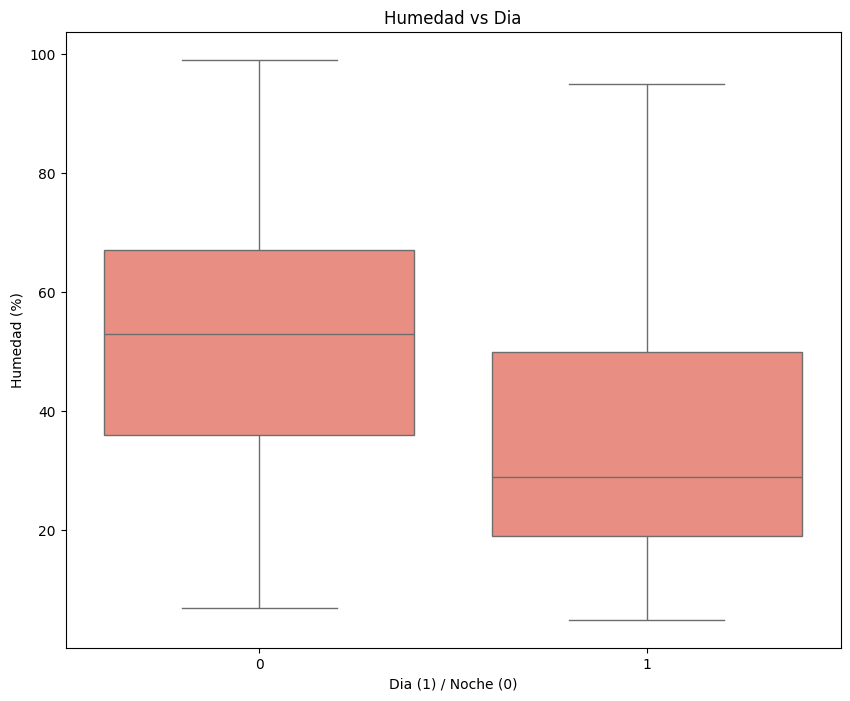

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_clima, x='es_dia', y='humedad_relativa', color = "salmon")
plt.title('Humedad vs Dia')
plt.xlabel("Dia (1) / Noche (0)")
plt.ylabel('Humedad (%)')


Text(0, 0.5, 'Temperatura (°C)')

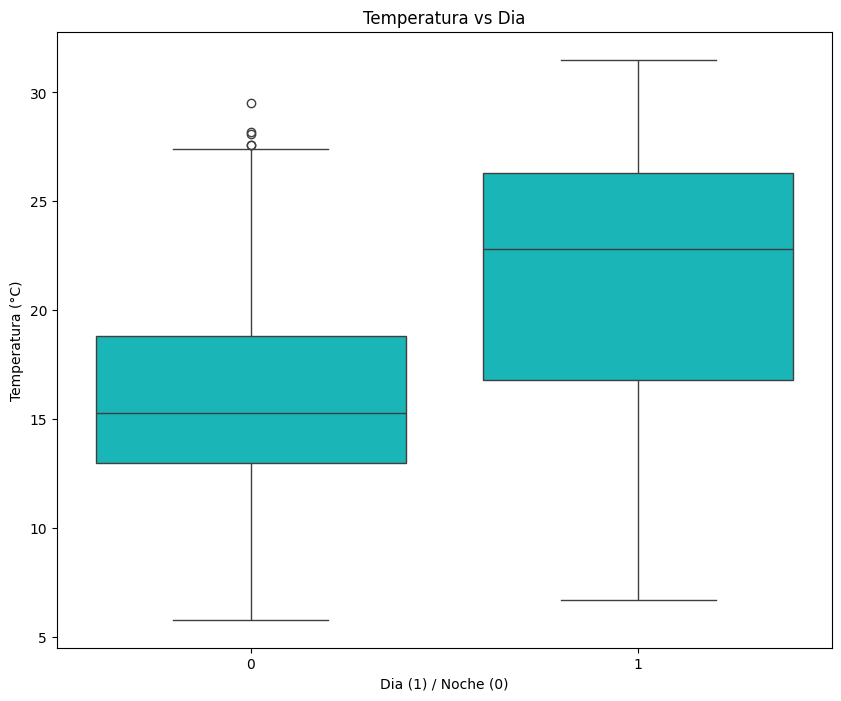

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_clima, x='es_dia', y='temperatura', color = "darkturquoise")
plt.title('Temperatura vs Dia')
plt.xlabel("Dia (1) / Noche (0)")
plt.ylabel('Temperatura (°C)')


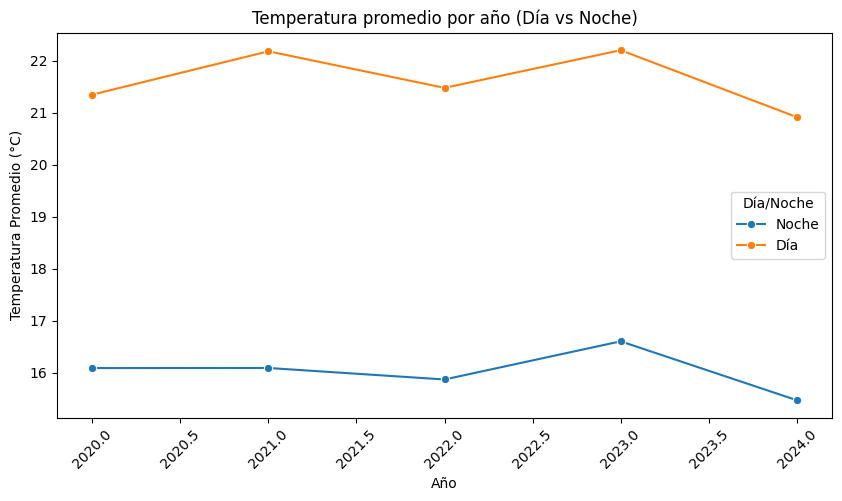

In [ ]:
# Comparamos la temperatura promedio por año de dia y de noche
df_clima["es_dia"] = df_clima["es_dia"].astype(str) #Convertimos en string para agrupar

# Agrupacion por año y es dias, se obtine el promedio con la funcion de agregacion
mean_temp = df_clima.groupby(["year", "es_dia"]).agg({"temperatura": "mean"}).reset_index()

#Figura final
plt.figure(figsize=(10,5))
sns.lineplot(data=mean_temp, x="year", y="temperatura", hue="es_dia", marker="o")
plt.title("Temperatura promedio por año (Día vs Noche)")
plt.xlabel("Año")
plt.ylabel("Temperatura Promedio (°C)")
plt.xticks(rotation=45)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["Noche", "Día"], title="Día/Noche")
plt.show()

## Matriz de correlacion de los datos


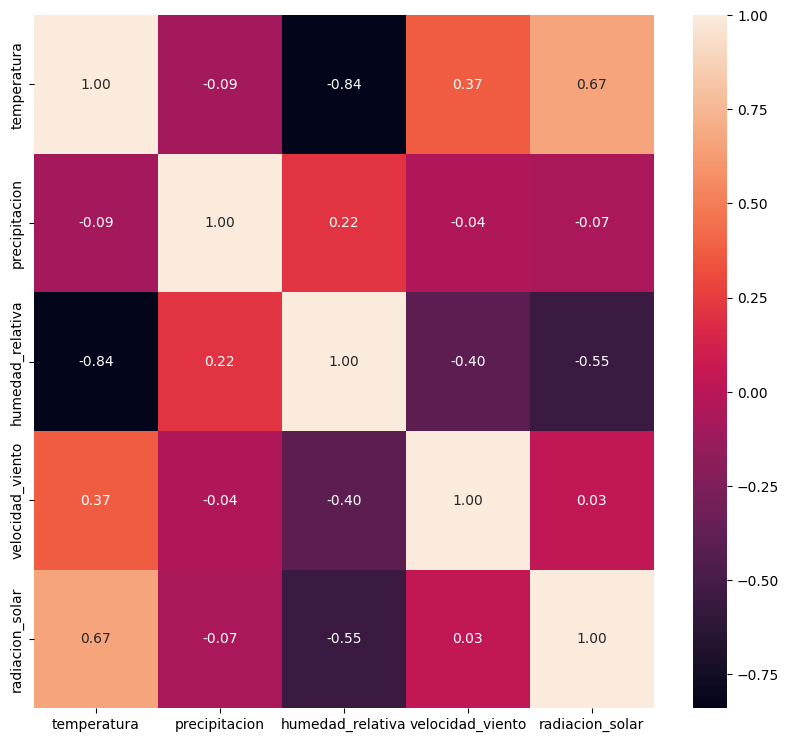

In [ ]:
# Matriz de correlacion
df_clima_numerico = df_clima.select_dtypes(include=['float64', 'int64']).drop(columns=["year","month","day","es_dia"],errors="ignore")
plt.figure(figsize=(10, 9))
sns.heatmap(df_clima_numerico.corr(), annot=True, fmt='.2f')
plt.show()

## Guardamos los datos en CSV

In [ ]:
df_clima.to_csv("datos_clima_gdl.csv", index=False)
print("Datos guardados en el archivo 'datos_clima_gdl.csv'")

Datos guardados en el archivo 'datos_clima_gdl.csv'


##Normalizacion de los datos

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# Copiar el Datframe para escalado
df_clima_escalado = df_clima.copy()

In [ ]:
numerical_columns = ["temperatura","precipitacion","humedad_relativa","velocidad_viento","radiacion_solar"] # Solo nos interesan las columnas numericas

## Escalado con MinMax Sacaler

In [ ]:
# Aplicar el escalado a las columnas numericas
scaler = MinMaxScaler() # Inicializar el scaler (Escalado de valores por defecto entre 0 y 1)
df_clima_escalado[numerical_columns] = scaler.fit_transform(df_clima_escalado[numerical_columns]) # Escogemos las columnas a escalar dentro del fit_transform

# Mostrar vista previa del DF
df_clima_escalado.describe()

,temperatura,precipitacion,humedad_relativa,velocidad_viento,es_dia,radiacion_solar,year,month,day
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.0,3240.000000
mean,0.497703,0.004414,0.422222,0.252829,0.458333,0.252333,2022.000000,2.0,14.000000
std,0.220067,0.038661,0.235224,0.171432,0.498338,0.340258,1.414432,0.0,7.790083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,2.0,1.000000
25%,0.315175,0.000000,0.212766,0.123494,0.000000,0.000000,2021.000000,2.0,7.000000
50%,0.459144,0.000000,0.404255,0.198795,0.000000,0.001024,2022.000000,2.0,14.000000
75%,0.684825,0.000000,0.606383,0.355422,1.000000,0.509980,2023.000000,2.0,21.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2024.000000,2.0,27.000000


## Standard Scaler

In [ ]:
# Prueba con standar scaler
df_clima_ss = df_clima.copy()
scaler_standard = StandardScaler() # Inicializar el standar scaler
df_clima_ss[numerical_columns] = scaler_standard.fit_transform(df_clima_escalado[numerical_columns])
df_clima_ss.describe()

,temperatura,precipitacion,humedad_relativa,velocidad_viento,es_dia,radiacion_solar,year,month,day
count,3.240000e+03,3.240000e+03,3.240000e+03,3.240000e+03,3240.000000,3.240000e+03,3240.000000,3240.0,3240.000000
mean,-3.508853e-17,-5.701886e-17,3.728156e-17,-2.631640e-16,0.458333,7.565964e-17,2022.000000,2.0,14.000000
std,1.000154e+00,1.000154e+00,1.000154e+00,1.000154e+00,0.498338,1.000154e+00,1.414432,0.0,7.790083
min,-2.261947e+00,-1.141782e-01,-1.795253e+00,-1.475035e+00,0.000000,-7.417079e-01,2020.000000,2.0,1.000000
25%,-8.295465e-01,-1.141782e-01,-8.905905e-01,-7.545557e-01,0.000000,-7.417079e-01,2021.000000,2.0,7.000000
50%,-1.752403e-01,-1.141782e-01,-7.639376e-02,-3.152393e-01,0.000000,-7.386993e-01,2022.000000,2.0,14.000000
75%,8.504289e-01,-1.141782e-01,7.830361e-01,5.985387e-01,1.000000,7.573266e-01,2023.000000,2.0,21.000000
max,2.282829e+00,2.575557e+01,2.456663e+00,4.359087e+00,1.000000,2.197693e+00,2024.000000,2.0,27.000000


## Seleccion de variables

In [ ]:
# Definir las variables predictoras y la varible objetivo (La que vamos a predecir)
predictoras = ["precipitacion","humedad_relativa","velocidad_viento","radiacion_solar","es_dia"]
variable_objetivo = "temperatura"

# Variables predictoras (X) y variables objetivo (y)
x = df_clima[predictoras]
y = df_clima[variable_objetivo]

## Mejores K variables

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

In [ ]:
# Definimimos el numero de caracteristicas que queremos retener
k = 3 # Seleccionamos las 3 mejores caracteristicas

# Craer el selector de caracteristicas usando f_regression
selector = SelectKBest(score_func=f_regression, k=k)

# Ajustar el selector a los datos
x_new = selector.fit_transform(x, y)

#Obtener los nombres de las caractertisticas seleccionadas
selected_features = x.columns[selector.get_support()]

# Imprimir las caracteristicas seleccionadas
print("Caracteristicas seleccionadas con SelectKBest:", selected_features.tolist())

Caracteristicas seleccionadas con SelectKBest: ['humedad_relativa', 'radiacion_solar', 'es_dia']


## Mutual Info Regression

In [ ]:
# Definir el número de características a seleccionar
k = 3  # Seleccionamos las 3 mejores características

# Inicializar el selector con mutual_info_regression como función de puntuación
selector = SelectKBest(score_func=mutual_info_regression, k=k)

# Ajustar el selector a los datos y transformar X para obtener únicamente las k mejores características
X_new = selector.fit_transform(x, y)

# Obtener los nombres de las características seleccionadas
selected_features = x.columns[selector.get_support()]

print("Características seleccionadas por SelectKBest con mutual_info_regression:")
print(selected_features.tolist())

Características seleccionadas por SelectKBest con mutual_info_regression:
['humedad_relativa', 'velocidad_viento', 'radiacion_solar']


In [ ]:
# Copiamos el dataframe escalado
df_clima_seleccionadas = df_clima_escalado.copy()

# Se eliminan las columnas que no son relevantes para la prediccion
df_clima_seleccionadas = df_clima[["precipitacion","humedad_relativa","velocidad_viento"]]

df_clima_seleccionadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   precipitacion     3240 non-null   float64
 1   humedad_relativa  3240 non-null   int64  
 2   velocidad_viento  3240 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 76.1 KB


## Pruebas del primer modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
# Lista de columnas numéricas
numerical_columns = ["precipitacion", "humedad_relativa", "velocidad_viento", "radiacion_solar"]

df_clima_scaled = df_clima.copy()

# MinMaxScaler hace un escalado de valores por defecto entre 0 y 1.
scaler = MinMaxScaler()
df_clima_scaled[numerical_columns] = scaler.fit_transform(df_clima_scaled[numerical_columns])

# Mostrar una vista previa del DataFrame escalado
print("Primeras filas del DataFrame escalado:")
df_clima_scaled.describe()

Primeras filas del DataFrame escalado:


,temperatura,precipitacion,humedad_relativa,velocidad_viento,es_dia,radiacion_solar,year,month,day
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.0,3240.000000
mean,18.590957,0.004414,0.422222,0.252829,0.458333,0.252333,2022.000000,2.0,14.000000
std,5.655717,0.038661,0.235224,0.171432,0.498338,0.340258,1.414432,0.0,7.790083
min,5.800000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,2.0,1.000000
25%,13.900000,0.000000,0.212766,0.123494,0.000000,0.000000,2021.000000,2.0,7.000000
50%,17.600000,0.000000,0.404255,0.198795,0.000000,0.001024,2022.000000,2.0,14.000000
75%,23.400000,0.000000,0.606383,0.355422,1.000000,0.509980,2023.000000,2.0,21.000000
max,31.500000,1.000000,1.000000,1.000000,1.000000,1.000000,2024.000000,2.0,27.000000


In [ ]:
df_clima_scaled['temperatura_class'] = df_clima_scaled['temperatura'].round().astype(int)
df_clima_scaled.head()

,temperatura,precipitacion,humedad_relativa,velocidad_viento,es_dia,radiacion_solar,year,month,day,id,temperatura_class
0,16.2,0.0,0.308511,0.054217,0.0,0.0,2020,2,1,bb65214f-9199-4fcc-b114-0de55bc20c36,16
1,15.6,0.0,0.329787,0.108434,0.0,0.0,2020,2,1,03f06464-aa04-4b5b-aae4-cb8fec2a28e4,16
2,15.1,0.0,0.351064,0.117470,0.0,0.0,2020,2,1,5f58d71f-9661-4acd-8d85-701b63e5cf02,15
3,14.6,0.0,0.372340,0.108434,0.0,0.0,2020,2,1,844f8b41-5cf0-4b53-be60-549d5dcc7b59,15
4,13.8,0.0,0.404255,0.105422,0.0,0.0,2020,2,1,5985745b-8cdf-4562-acce-4feff6bb1bb3,14


In [ ]:
# Definir las variables preductoras y la objetivo
predictoras = ["humedad_relativa","es_dia","radiacion_solar"]
objetivo = "temperatura_class"

# Variables predictoras en X y la objetivo en Y
x = df_clima_scaled[predictoras]
y = df_clima_scaled[objetivo]

# Dividir los datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

 # Entrenar el modelo RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Realizar predicciones y evaluar el modelo random forest
y_pred = rf_model.predict(x_test)

In [ ]:

# Cálculo de métricas para RandomForest
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=True)
recall = recall_score(y_test, y_pred, average='macro', zero_division=True)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=True)

print("Accuracy:", accuracy)
print("Precision (macro):", precision)
print("Recall (macro):", recall)
print("F1-score (macro):", f1)

Accuracy: 0.14506172839506173
Precision (macro): 0.15846284368327387
Recall (macro): 0.11946405999283748
F1-score (macro): 0.11447633115898707


## Usando radiacion solar como objetivo

In [ ]:
# Lista de columnas numéricas
numerical_columns = ["precipitacion", "humedad_relativa", "velocidad_viento", "temperatura"]

df_clima_scaled = df_clima.copy()

# MinMaxScaler hace un escalado de valores por defecto entre 0 y 1.
scaler = MinMaxScaler()
df_clima_scaled[numerical_columns] = scaler.fit_transform(df_clima_scaled[numerical_columns])

# Mostrar una vista previa del DataFrame escalado
print("Primeras filas del DataFrame escalado:")
df_clima_scaled.describe()

Primeras filas del DataFrame escalado:


,temperatura,precipitacion,humedad_relativa,velocidad_viento,es_dia,radiacion_solar,year,month,day
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.0,3240.000000
mean,0.497703,0.004414,0.422222,0.252829,0.458333,246.529321,2022.000000,2.0,14.000000
std,0.220067,0.038661,0.235224,0.171432,0.498338,332.431903,1.414432,0.0,7.790083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,2.0,1.000000
25%,0.315175,0.000000,0.212766,0.123494,0.000000,0.000000,2021.000000,2.0,7.000000
50%,0.459144,0.000000,0.404255,0.198795,0.000000,1.000000,2022.000000,2.0,14.000000
75%,0.684825,0.000000,0.606383,0.355422,1.000000,498.250000,2023.000000,2.0,21.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,977.000000,2024.000000,2.0,27.000000


In [ ]:
threshold = df_clima_scaled['radiacion_solar'].median()
df_clima_scaled['alta_radiacion'] = (df_clima_scaled['radiacion_solar'] > threshold).astype(int)

In [ ]:
df_clima_scaled.describe()

,temperatura,precipitacion,humedad_relativa,velocidad_viento,es_dia,radiacion_solar,year,month,day,alta_radiacion
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.0,3240.000000,3240.000000
mean,0.497703,0.004414,0.422222,0.252829,0.458333,246.529321,2022.000000,2.0,14.000000,0.500000
std,0.220067,0.038661,0.235224,0.171432,0.498338,332.431903,1.414432,0.0,7.790083,0.500077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,2.0,1.000000,0.000000
25%,0.315175,0.000000,0.212766,0.123494,0.000000,0.000000,2021.000000,2.0,7.000000,0.000000
50%,0.459144,0.000000,0.404255,0.198795,0.000000,1.000000,2022.000000,2.0,14.000000,0.500000
75%,0.684825,0.000000,0.606383,0.355422,1.000000,498.250000,2023.000000,2.0,21.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,977.000000,2024.000000,2.0,27.000000,1.000000


In [ ]:
# Definir las variables preductoras y la objetivo
predictoras = ["humedad_relativa","es_dia","temperatura"]
objetivo = "alta_radiacion"

# Variables predictoras en X y la objetivo en Y
x = df_clima_scaled[predictoras]
y = df_clima_scaled[objetivo]

# Dividir los datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

 # Entrenar el modelo RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Realizar predicciones y evaluar el modelo random forest
y_pred = rf_model.predict(x_test)

In [ ]:
# Cálculo de métricas para RandomForest
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=True)
recall = recall_score(y_test, y_pred, average='macro', zero_division=True)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=True)

print("Accuracy:", accuracy)
print("Precision (macro):", precision)
print("Recall (macro):", recall)
print("F1-score (macro):", f1)

Accuracy: 0.9614197530864198
Precision (macro): 0.9625902992776058
Recall (macro): 0.9612020920860842
F1-score (macro): 0.9613791919668719


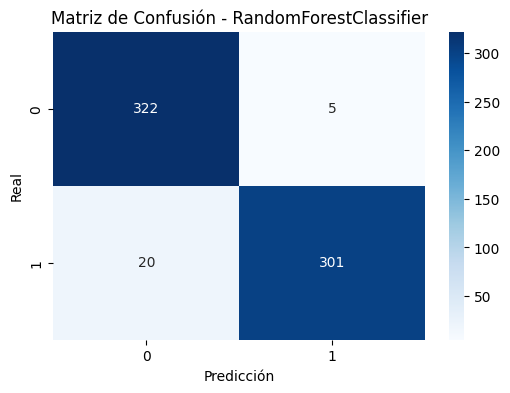

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - RandomForestClassifier")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()